In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [4]:
data.shape

(7920, 3)

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

##Text Preprocessing

In [7]:
import re
import string

convert uppercase to lowercase

In [8]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [9]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove links

In [10]:
data["tweet"] = data['tweet'].apply(
    lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', word, flags=re.MULTILINE) for word in x.split())
)

In [11]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove punctuations

In [12]:
def remove_punctuations(text):
    for punctuation in string.punctuation:  # Fixed typo here
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [13]:
data["tweet"] = data['tweet'].str.replace(r'\d+', '', regex=True)

data["tweet"].tail(10)

remove stop words

In [14]:
!pip install nltk

In [15]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\MSI\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [16]:
import nltk

In [24]:
nltk.download('stopwords',download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [25]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [26]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [27]:
data["tweet"] =  data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

Stemming

In [28]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [29]:
data["tweet"] =  data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

Building vocabulary

In [30]:
from collections import Counter 
vocab = Counter()

In [31]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [32]:
vocab

Counter({'iphon': 4077,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 349,
         'beauti': 323,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'fuck': 295,
         'im': 294,
         'happi': 294,
         'back': 294,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [33]:
tokens = [key for key in vocab if vocab[key] > 10]

In [34]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purcha',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batte

In [35]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

Divide Dataset

In [36]:
x = data['tweet']
y = data['label']

In [37]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\MSI\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [39]:
x_train.shape

(6336,)

In [40]:
x_test.shape

(1584,)

In [41]:
y_train

1855    0
6599    0
6205    0
6312    0
2779    0
       ..
2319    0
1716    0
2957    0
947     1
5863    1
Name: label, Length: 6336, dtype: int64

Vectorization

In [42]:
def vectorizer(ds, vocabulary):
    vectorized_1st = []  # Initialize the list before using it

    for sentence in ds:
        sentence_1st = [0] * len(vocabulary)
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_1st[i] = 1  # Use 'sentence_1st' instead of 'sentence_list'
        
        vectorized_1st.append(sentence_1st)  # Append sentence_1st, not sentence_list

    vectorized_1st_new = np.asarray(vectorized_1st, dtype=np.float32)

    return vectorized_1st_new


In [43]:
vectorized_x_train = vectorizer(x_train, tokens)

In [44]:
for i in vectorized_x_train[0]:
    print(i)

0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [45]:
vectorized_x_test = vectorizer(x_test, tokens)

In [46]:
y_train.value_counts()

label
0    4698
1    1638
Name: count, dtype: int64

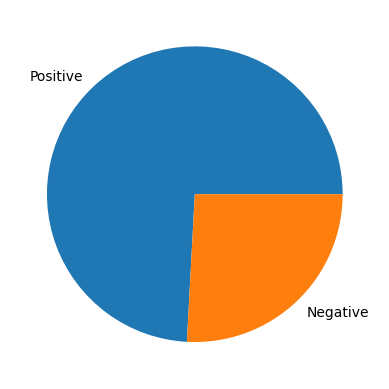

In [47]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [48]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\MSI\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


Handle imbalance dataset

In [49]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9396, 1141) (9396,)


In [50]:
y_train_smote.value_counts()

label
0    4698
1    4698
Name: count, dtype: int64

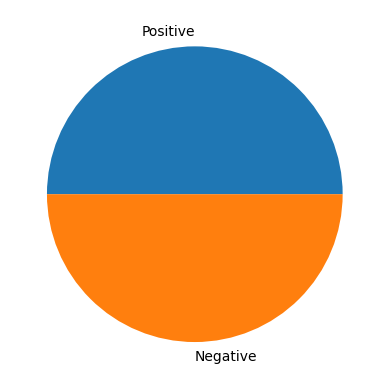

In [51]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [52]:
vectorized_x_train_smote

array([[0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       ...,
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.839821, 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ]],
      shape=(9396, 1141), dtype=float32)

In [53]:
y_train_smote

0       0
1       0
2       0
3       0
4       0
       ..
9391    1
9392    1
9393    1
9394    1
9395    1
Name: label, Length: 9396, dtype: int64

In [54]:
vectorized_x_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], shape=(1584, 1141), dtype=float32)

In [55]:
y_test

5350    1
2700    0
860     0
2339    0
815     0
       ..
4989    1
7594    1
7431    0
2547    0
6972    0
Name: label, Length: 1584, dtype: int64

Model Training

In [60]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\MSI\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [65]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act,  y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f"Testing Score:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}")


Logistic Regression

In [67]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

LogisticRegression()

In [68]:
y_train_pred = lr.predict(vectorized_x_train_smote)

In [69]:
y_train_pred

array([0, 0, 0, ..., 1, 1, 1], shape=(9396,))

In [70]:
y_train_smote

0       0
1       0
2       0
3       0
4       0
       ..
9391    1
9392    1
9393    1
9394    1
9395    1
Name: label, Length: 9396, dtype: int64

In [71]:
training_scores(y_train_smote, y_train_pred)

Testing Score:
	Accuracy = 0.938
	Precision = 0.913
	Recall = 0.969
	F1-Score = 0.94


In [73]:
y_test_pred = lr.predict(vectorized_x_test)

In [74]:
y_test_pred

array([1, 0, 0, ..., 0, 0, 0], shape=(1584,))

In [75]:
y_test

5350    1
2700    0
860     0
2339    0
815     0
       ..
4989    1
7594    1
7431    0
2547    0
6972    0
Name: label, Length: 1584, dtype: int64

In [79]:
training_scores(y_test, y_test_pred)

Testing Score:
	Accuracy = 0.874
	Precision = 0.7
	Recall = 0.853
	F1-Score = 0.769


In [81]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

training_scores(y_test, y_test_pred)

Testing Score:
	Accuracy = 0.905
	Precision = 0.868
	Recall = 0.955
	F1-Score = 0.909
Testing Score:
	Accuracy = 0.866
	Precision = 0.66
	Recall = 0.936
	F1-Score = 0.774


## Decision Tree

In [82]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

training_scores(y_test, y_test_pred)

Testing Score:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Score:
	Accuracy = 0.84
	Precision = 0.668
	Recall = 0.686
	F1-Score = 0.677


## RandomForest

In [83]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

training_scores(y_test, y_test_pred)

Testing Score:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Score:
	Accuracy = 0.878
	Precision = 0.761
	Recall = 0.732
	F1-Score = 0.746


## Support Vector

In [84]:
svm = SVC()
svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

training_scores(y_test, y_test_pred)

Testing Score:
	Accuracy = 0.978
	Precision = 0.962
	Recall = 0.996
	F1-Score = 0.979
Testing Score:
	Accuracy = 0.888
	Precision = 0.753
	Recall = 0.809
	F1-Score = 0.78


In [86]:
import pickle
with open('../static/model/model.pickle','wb') as file:
    pickle.dump(lr,file)